# <font color='blue'>Data Science Academy</font>

## <font color='blue'>Fundamentos de Linguagem Python Para Análise de Dados e Data Science</font>

## <font color='blue'>Projeto 2</font>

## <font color='blue'>Análise Exploratória de Dados em Linguagem Python Para a Área de Varejo</font>

In [46]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.9.12


In [47]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## Carregando os Dados

In [48]:
# Carrega o dataset
df_dsa = pd.read_csv('dados/dataset.csv')

In [49]:
# Shape
df_dsa.shape

(9700, 11)

In [5]:
# Amostra dos dados
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [6]:
# Amostra dos dados
df_dsa.tail()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
9695,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-PA-10004569,Office Supplies,Paper,22.830
9696,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-AP-10000027,Office Supplies,Appliances,54.320
9697,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,TEC-PH-10000675,Technology,Phones,196.776
9698,CA-2017-105291,30/10/2017,SP-20920,Consumer,United States,San Luis Obispo,California,OFF-FA-10003059,Office Supplies,Fasteners,3.620
9699,CA-2018-147032,31/07/2018,LB-16795,Home Office,United States,Wilmington,Delaware,OFF-PA-10003256,Office Supplies,Paper,11.540


## Análise Exploratória

In [7]:
# Colunas do conjunto de dados
df_dsa.columns

Index(['ID_Pedido', 'Data_Pedido', 'ID_Cliente', 'Segmento', 'Pais', 'Cidade',
       'Estado', 'ID_Produto', 'Categoria', 'SubCategoria', 'Valor_Venda'],
      dtype='object')

In [8]:
# Verificando o tipo de dado de cada coluna
df_dsa.dtypes

ID_Pedido        object
Data_Pedido      object
ID_Cliente       object
Segmento         object
Pais             object
Cidade           object
Estado           object
ID_Produto       object
Categoria        object
SubCategoria     object
Valor_Venda     float64
dtype: object

In [9]:
# Resumo estatístico da coluna com o valor de venda
df_dsa['Valor_Venda'].describe()

count     9700.000000
mean       230.469892
std        627.504252
min          0.444000
25%         17.248000
50%         54.272000
75%        209.932500
max      22638.480000
Name: Valor_Venda, dtype: float64

In [10]:
# Verificando se há registros duplicados
df_dsa[df_dsa.duplicated()]

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda


In [11]:
# Verificando de há valores ausentes
df_dsa.isnull().sum()

ID_Pedido       0
Data_Pedido     0
ID_Cliente      0
Segmento        0
Pais            0
Cidade          0
Estado          0
ID_Produto      0
Categoria       0
SubCategoria    0
Valor_Venda     0
dtype: int64

In [12]:
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


## Pergunta de Negócio 1:

### Qual Cidade com Maior Valor de Venda de Produtos da Categoria 'Office Supplies'?

In [13]:
# Analisando a cidade com o maior valor de venda

total_vendas = df_dsa[df_dsa['Categoria'] == 'Office Supplies'].groupby('Cidade')['Valor_Venda'].sum()
cidade = total_vendas.idxmax()
total_cidade = total_vendas.max()

In [14]:
print(f"A cidade com o maior número de vendas é: {cidade}, com o total de {total_cidade:.2f}")

A cidade com o maior número de vendas é: New York City, com o total de 68362.81


In [15]:
# Listando as cidades e valores decrescentes como prova real dos valores na célula acima.
# ascending= False para mostrar em orde decrescente.
total_vendas.sort_values(ascending= False)

Cidade
New York City    68362.814
Los Angeles      47098.100
San Francisco    41771.198
Seattle          34856.878
Philadelphia     29313.687
                   ...    
Ormond Beach         2.808
Pensacola            2.214
Jupiter              2.064
Elyria               1.824
Abilene              1.392
Name: Valor_Venda, Length: 480, dtype: float64

## Pergunta de Negócio 2:

### Qual o Total de Vendas Por Data do Pedido?

Demonstre o resultado através de um gráfico de barras.

In [16]:
df_dsa[['Data_Pedido', 'Valor_Venda']].groupby(['Data_Pedido']).agg('sum')

,Valor_Venda
Data_Pedido,
01/01/2018,1481.8280
01/02/2015,468.9000
01/02/2017,161.9700
01/03/2015,2203.1510
01/03/2016,1642.1744
...,...
31/10/2017,2346.5790
31/10/2018,523.9280
31/12/2015,5253.2700


<Axes: ylabel='Data_Pedido'>

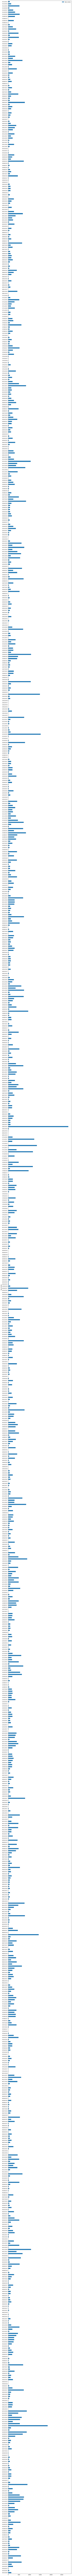

In [17]:
df_dsa[['Valor_Venda', 'Data_Pedido']].groupby(['Data_Pedido']).sum('Valor_Venda') \
.sort_values('Data_Pedido').plot.barh(figsize=(12, 500))


## Pergunta de Negócio 3:

### Qual o Total de Vendas por Estado?

Demonstre o resultado através de um gráfico de barras.

In [18]:
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


<Axes: xlabel='Estado'>

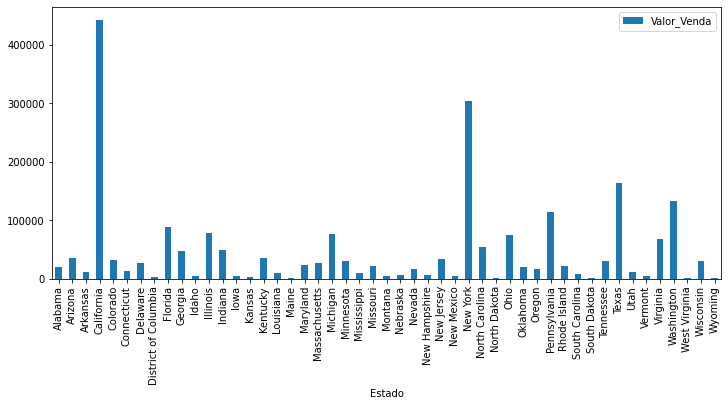

In [19]:
df_dsa[['Estado','Valor_Venda']].groupby(['Estado']).sum('Valor_Venda').plot.bar(figsize=(12, 5))

## Pergunta de Negócio 4:

### Quais São as 10 Cidades com Maior Total de Vendas?

Demonstre o resultado através de um gráfico de barras.

In [20]:
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


<Axes: ylabel='Cidade'>

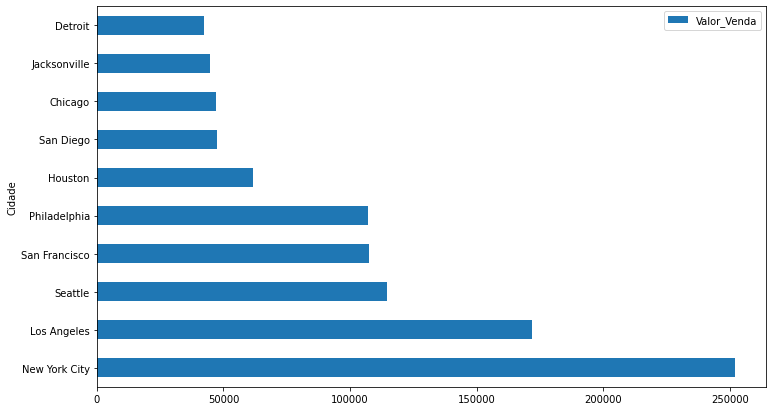

In [21]:

df_dsa[['Cidade', 'Valor_Venda']].groupby(['Cidade']).sum('Valor_Venda') \
.sort_values(by = 'Valor_Venda', ascending= False).head(10).plot.barh(figsize=(12, 7))

## Pergunta de Negócio 5:

### Qual Segmento Teve o Maior Total de Vendas?

Demonstre o resultado através de um gráfico de pizza.

In [22]:
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [23]:
# Capturando os dados distintos da coluna segmentos
segmentos = df_dsa['Segmento'].unique()

In [24]:
# Imprimindo o valores de segmento
print(segmentos)

['Consumer' 'Corporate' 'Home Office']


In [25]:
# Somando os valores das vendas e agrupando por segmento
total_cidade = df_dsa.groupby(['Segmento'])['Valor_Venda'].sum()


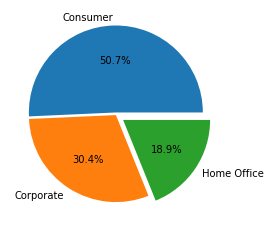

In [26]:
# pie para o gráfico pizza, total_cidade é o resultado das somas das vendas, labels são os nomes dos segmentos
# autopct para mostrar os valores dentro de cada fatia, explode para separar uma fatia da outra com um pequeno
# espaço em branco.
plt.pie(total_cidade, labels= segmentos, autopct='%1.1f%%', explode= (0.03, 0, 0.1))
plt.show()

## Pergunta de Negócio 6 (Desafio Nível Baby):

### Qual o Total de Vendas Por Segmento e Por Ano?

In [27]:
# Analisando a distinção dos anos, utilizando o método unique para filtrar por ano
ano = df_dsa['Data_Pedido'].str.split('/').str[2].unique()    

In [28]:
print(ano)

['2017' '2016' '2015' '2018']


In [29]:
# Após descobrir os respectivos anos, removemos o método .unique() para manter a quantidade total de linhas
ano = df_dsa['Data_Pedido'].str.split('/').str[2]

In [30]:
# Agrupando por segmento e ano, e efetuando a soma total por ano.
total_segmento = df_dsa.groupby(['Segmento', ano])['Valor_Venda'].agg(TotalVendas=('sum'))

In [31]:
print(total_segmento)

                         TotalVendas
Segmento    Data_Pedido             
Consumer    2015         256719.9166
            2016         265295.2593
            2017         288459.5572
            2018         323359.6019
Corporate   2015         125819.5957
            2016         114643.1229
            2017         203266.7398
            2018         235502.7284
Home Office 2015          88229.0878
            2016          74134.1332
            2017         103639.6270
            2018         156488.5849


## Pergunta de Negócio 7 (Desafio Nível Júnior):

Os gestores da empresa estão considerando conceder diferentes faixas de descontos e gostariam de fazer uma simulação com base na regra abaixo:

- Se o Valor_Venda for maior que 1000 recebe 15% de desconto.
- Se o Valor_Venda for menor que 1000 recebe 10% de desconto.

### Quantas Vendas Receberiam 15% de Desconto?

In [32]:
venda_maior = df_dsa.query('Valor_Venda > 1000')

In [33]:
# Para comparar o valor original, menos o valor com desconto
df_desconto['Com_Desconto'] = venda_maior['Valor_Venda'] - (venda_maior['Valor_Venda'] * 15 / 100)

NameError: name 'df_desconto' is not defined

In [ ]:
# Exibindo o valor sem desconto(Valor_Venda) e o valor com desconto(ComDeconto)
df_desconto

In [ ]:
# Utilizando o pandas, já é possível visualizar o resultado na última linha (457)
venda_maior

In [ ]:
# Caso o pandas não pudesse oferecer o recurso de contar a quantidade de linhas, poderíamos utilizar o médtodo
# .count() que faz a contagem dos dados mencionados.
venda_maior.count()

## Pergunta de Negócio 8 (Desafio Nível Master):

### Considere Que a Empresa Decida Conceder o Desconto de 15% do Item Anterior. Qual Seria a Média do Valor de Venda Antes e Depois do Desconto?

In [ ]:
# Calculando a média dos valores de vendas acimda de 1000
df_desconto[['Valor_Venda', 'Com_Desconto']].mean()

## Pergunta de Negócio 9 (Desafio Nível Master Ninja):

### Qual o Média de Vendas Por Segmento, Por Ano e Por Mês?

Demonstre o resultado através de gráfico de linha.

In [ ]:
# Split para separar os dados por mês
mes = df_dsa['Data_Pedido'].str.split('/').str[1].unique()

In [ ]:
print(mes)

In [ ]:
# total_segmento = df_dsa.groupby(['Segmento', ano])['Valor_Venda'].agg(TotalVendas=('sum'))
# df_dsa[['Data_Pedido', 'Valor_Venda']].groupby(['Data_Pedido']).agg('sum')
mes = df_dsa['Data_Pedido'].str.split('/').str[1]
ano = df_dsa['Data_Pedido'].str.split('/').str[2]

In [ ]:
df_dsa['Segmento']
#print(mes)

In [ ]:
# Calculando o valor da venda média por mês
df_mes = df_dsa.groupby([mes])['Valor_Venda'].agg(MediaVendasMes=('mean'))
df_ano = df_dsa.groupby([ano])['Valor_Venda'].agg(MediaVendasAno=('mean'))
df_segmento = df_dsa.groupby(['Segmento'])['Valor_Venda'].agg(MediaVendasSegmento=('mean'))

In [ ]:
print(df_mes)

In [ ]:
print(df_ano)

In [ ]:
print(df_segmento)

In [ ]:
df_segmentoMesAno = pd.concat([df_segmento, df_ano, df_mes])

In [ ]:
plt.plot(df_segmento, label= 'Total por Segmento')
plt.legend()
plt.show()

In [ ]:
plt.plot(df_ano, label= 'Total por ano')
plt.legend()
plt.show()

In [ ]:
plt.plot(df_mes, label= 'Total por mês')
plt.legend()
plt.show()

## Pergunta de Negócio 10 (Desafio Nível Master Ninja das Galáxias):

### Qual o Total de Vendas Por Categoria e SubCategoria, Considerando Somente as Top 12 SubCategorias? 

Demonstre tudo através de um único gráfico.

In [51]:
# Agrupamos por categoria e subcategoria e calculamos a soma somente para variáveus numéricas
df_dsa_p10 = df_dsa.groupby(['Categoria',
                             'SubCategoria']).sum(numeric_only = True).sort_values('Valor_Venda',
                                                                                   ascending = False).head(12)

In [52]:
# Convertemos a coluna Valor_Venda em número inteiro e classificamos por categoria
df_dsa_p10 = df_dsa_p10[['Valor_Venda']].astype(int).sort_values(by = 'Categoria').reset_index()

In [53]:
# Dataframe com categorias e subcategorias
df_dsa_p10

,Categoria,SubCategoria,Valor_Venda
0,Furniture,Chairs,317919
1,Furniture,Tables,202083
2,Furniture,Bookcases,108045
3,Furniture,Furnishings,88862
4,Office Supplies,Storage,216188
5,Office Supplies,Binders,194723
6,Office Supplies,Appliances,104061
7,Office Supplies,Paper,76312
8,Technology,Phones,325271
9,Technology,Machines,189238


In [54]:
# Criamos outro dataframe somente com os totais por categoria
df_dsa_p10_cat = df_dsa_p10.groupby('Categoria').sum(numeric_only = True).reset_index()

In [55]:
# Dataframe com categorias 
df_dsa_p10_cat

,Categoria,Valor_Venda
0,Furniture,716909
1,Office Supplies,591284
2,Technology,823548


In [56]:
# Listas de cores para categorias
cores_categorias = ['#5d00de',
                    '#0ee84f',
                    '#e80e27']

In [57]:
# Listas de cores para subcategorias
cores_subcategorias = ['#aa8cd4',
                       '#aa8cd5',
                       '#aa8cd6',
                       '#aa8cd7',
                       '#26c957',
                       '#26c958',
                       '#26c959',
                       '#26c960',
                       '#e65e65',
                       '#e65e66',
                       '#e65e67',
                       '#e65e68']

NameError: name 'autopct_format' is not defined

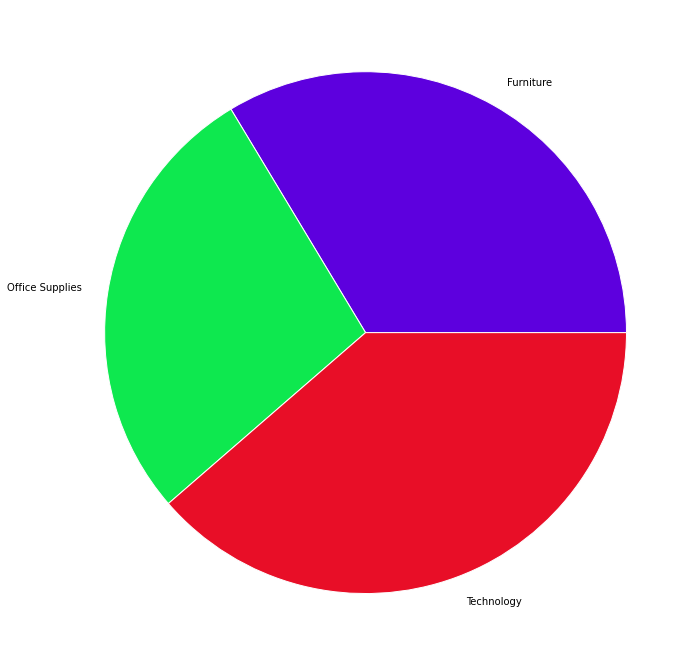

In [58]:
# Plot

# Tamanho da figura
fig, ax = plt.subplots(figsize = (18,12))

# Gráfico das categorias
p1 = ax.pie(df_dsa_p10_cat['Valor_Venda'], 
            radius = 1,
            labels = df_dsa_p10_cat['Categoria'],
            wedgeprops = dict(edgecolor = 'white'),
            colors = cores_categorias)

# Gráfico das subcategorias
p2 = ax.pie(df_dsa_p10['Valor_Venda'],
            radius = 0.9,
            labels = df_dsa_p10['SubCategoria'],
            autopct = autopct_format(df_dsa_p10['Valor_Venda']),
            colors = cores_subcategorias, 
            labeldistance = 0.7,
            wedgeprops = dict(edgecolor = 'white'), 
            pctdistance = 0.53,
            rotatelabels = True)

# Limpa o centro do círculo
centre_circle = plt.Circle((0, 0), 0.6, fc = 'white')

# Labels e anotações
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.annotate(text = 'Total de Vendas: ' + '$ ' + str(int(sum(df_dsa_p10['Valor_Venda']))), xy = (-0.2, 0))
plt.title('Total de Vendas Por Categoria e Top 12 SubCategorias')
plt.show()

# Fim